<a href="https://colab.research.google.com/github/elkarami/Applications/blob/main/traffic_signs%20avec%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Analyse et modelisation des paneaux de signalisation</h1> </center>

**install kaggle librarie**

In [9]:
!pip -q install kaggle
    

**Load the personal Kaggle Key**

In [ ]:
from google.colab import files
files.upload()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**prepare envirenement**

In [23]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/*': No such file or directory


**Load Data from Kaggle**

In [36]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 602M/612M [00:03<00:00, 167MB/s]
100% 612M/612M [00:03<00:00, 165MB/s]


**Extract Data**

In [ ]:
!unzip gtsrb-german-traffic-sign.zip 

**import libraries and intialization**

In [35]:
import kaggle
import numpy as np
import pandas as pd
import os 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.metrics import accuracy_score

from matplotlib import style
# Initialization 
np.random.seed(42)
style.use('fivethirtyeight')
# os.getcwd() current working diractory
os.chdir('/content/')
train_path = 'Train/'
test_path = 'Test/'

**Understand the Dataset**
* The originel datasets in /content/
* there is 3 Subsets : **Train,Test,Meta**.
* Each subset have an **csv file** and a **subdir** with **images**. 

**how much Class in our dataset ?**

In [ ]:
classes =  len(os.listdir(train_path))

print (f"there is {classes} class in this DataSet")

In [ ]:
df = pd.read_csv('Test.csv')
df.head()

**Description**
* **Width** : width of the image.
* **Height** : Height of the image.
* **Roi.X1 Roi.X2 Roi.Y1 Roi.Y2** : describe where the Sign is located. 
* **ClassId** : the terget Class.
* **Path** of the image.

**Retrieving the images and their labels** 

In [ ]:
data = []
labels = []
for i in range(classes):
  path = os.path.join(os.getcwd(),'Train',str(i))
  images = os.listdir(path)

  for a in images:
    try:
      image= Image.open(path+'/'+a)
      image=image.resize((30,30))
      image=np.array(image) 
      data.append(image)
      labels.append(i)
    except:
      print('Error loading image')
      continue
data = np.array(data)
labels = np.array(labels)
print(data.shape , labels.shape)

our train set contains 39209 RGB images with targets.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=.2,random_state=42)

In [ ]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

**Building the Model**

In [ ]:
from keras.layers.attention.multi_head_attention import activation
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax'))


# Compilation of The Model

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(X_train,y_train,batch_size=32,epochs=epochs,validation_data=(X_test,y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 154s 156ms/step - loss: 1.9312 - accuracy: 0.4988 - val_loss: 0.5675 - val_accuracy: 0.8563
Epoch 2/15
981/981 [==============================] - 152s 155ms/step - loss: 0.6378 - accuracy: 0.8099 - val_loss: 0.2254 - val_accuracy: 0.9401
Epoch 3/15
981/981 [==============================] - 152s 155ms/step - loss: 0.4080 - accuracy: 0.8809 - val_loss: 0.1548 - val_accuracy: 0.9583
Epoch 4/15
981/981 [==============================] - 152s 155ms/step - loss: 0.3381 - accuracy: 0.9041 - val_loss: 0.1132 - val_accuracy: 0.9698
Epoch 5/15
981/981 [==============================] - 152s 155ms/step - loss: 0.2947 - accuracy: 0.9152 - val_loss: 0.0896 - val_accuracy: 0.9769
Epoch 6/15
981/981 [==============================] - 155s 158ms/step - loss: 0.2766 - accuracy: 0.9197 - val_loss: 0.0874 - val_accuracy: 0.9776
Epoch 7/15
981/981 [==============================] - 157s 160ms/step - loss: 0.2417 - accuracy: 0.9321 - val_loss: 0.0646 -

**Load Model**

In [4]:
from keras.models import load_model

In [5]:
my_model = load_model('/content/drive/MyDrive/Colab Notebooks/my_model.h5')

In [44]:
dict_classes ={ 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }


In [82]:
from skimage import io
def classify(fspath):
  predictions = []
  for fpath in fspath:
    image = Image.open(fpath)
    image = image.resize((30,30))
    image = np.expand_dims(image,axis=0)
    image = np.array(image)
    # print(image.shape)
    pred = my_model.predict([image])
    classes_x=np.argmax(pred,axis=1)
    sign = dict_classes[(classes_x+1)[0]]
    # print(sign)
    predictions.append(sign)
  return predictions




In [88]:
images_test = [f'/content/test/000{20+i}.png' for i in range(10)]
predictions = classify(images_test)
images_test

1/1 [==============================] - 0s 19ms/step


['/content/test/00020.png',
 '/content/test/00021.png',
 '/content/test/00022.png',
 '/content/test/00023.png',
 '/content/test/00024.png',
 '/content/test/00025.png',
 '/content/test/00026.png',
 '/content/test/00027.png',
 '/content/test/00028.png',
 '/content/test/00029.png']

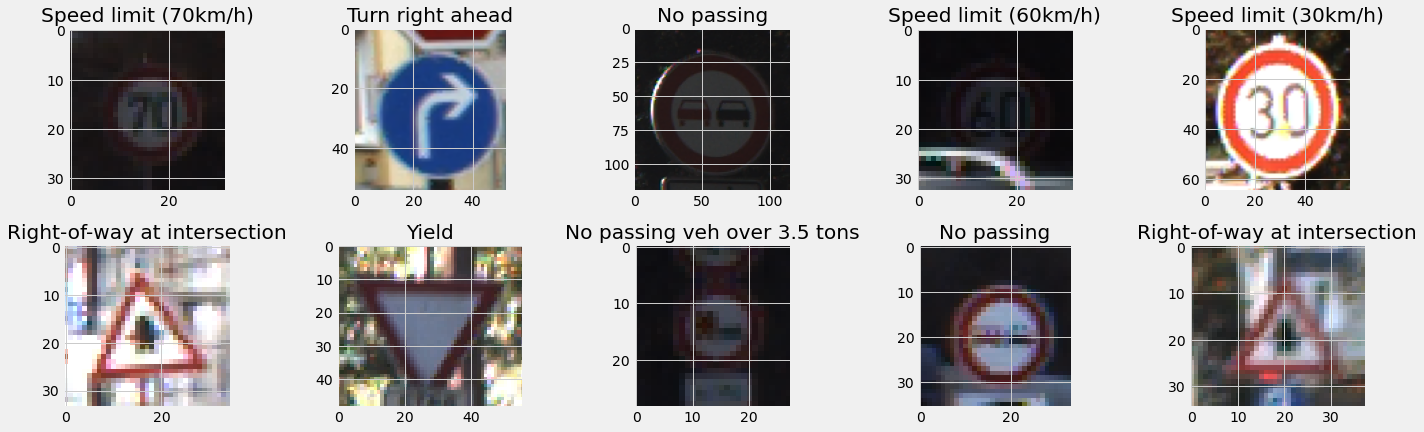

In [93]:
plt.figure(figsize=(20,12))
cls = {0:'chat', 1:'chien'}
for i in range(1,11):
    plt.subplot(4,5,i)
    image = plt.imread(images_test[i-1])
    plt.imshow(image,cmap='gray')
    plt.title(predictions[i-1] )
    plt.tight_layout()
plt.show()